In [ ]:
!pip install scikit-learn torch torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('data/coorteeqsrafva.csv', sep=';', header=0, index_col=0)

print(df.shape)
df.head()

(6428, 30)


,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,nurse,site,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,STACH,10900,VA,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
1,AFLT,10900,AF,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
2,SR,8209,SR,12281.0,55.0,0,NaN,NaN,1.0,2.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/08000/08209_lr,records500/08000/08209_hr
3,STACH,17620,VA,2007.0,29.0,1,164.0,56.0,7.0,1.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/17000/17620_lr,records500/17000/17620_hr
4,SBRAD,12967,VA,8685.0,57.0,0,NaN,NaN,0.0,0.0,...,False,NaN,", I-AVR,",NaN,NaN,NaN,NaN,1,records100/12000/12967_lr,records500/12000/12967_hr


In [ ]:
print('Normal (SR) has a total of {} rows'.format(df.loc[df['ritmi'] == 'SR'].shape[0]))
print('Atrial Fibrillation (AF) has a total of {} rows'.format(df.loc[df['ritmi'] == 'AF'].shape[0]))
print('Other arrhythmia (VA) has a total of {} rows'.format(df.loc[df['ritmi'] == 'VA'].shape[0]))

Normal (SR) has a total of 2000 rows
Atrial Fibrillation (AF) has a total of 1587 rows
Other arrhythmia (VA) has a total of 2841 rows


In [ ]:
ecgeq_arr = np.load('/data/ecgeq-500hzsrfava.npy')
print(ecgeq_arr.shape)
ecgeq_arr

(6428, 5000, 12)


array([[[-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        ...,
        [ 0.03 , -0.045, -0.075, ..., -0.02 , -0.035, -0.045],
        [ 0.03 , -0.045, -0.075, ..., -0.02 , -0.035, -0.045],
        [ 0.03 , -0.045, -0.075, ..., -0.02 , -0.035, -0.045]],

       [[-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        ...,
        [ 0.03 , -0.045, -0.075, ..., -0.02 , -0.035, -0.045],
        [ 0.03 , -0.045, -0.075, ..., -0.02 , -0.035, -0.045],
        [ 0.03 , -0.045, -0.075, ..., -0.02 , -0.035, -0.045]],

       [[-0.17 , -0.13 ,  0.04 , ..., -0.14 , -0.05 , -0.03 ],
        [-0.17 , -0.13 ,  0.04 , ..., -0.14 , -0.05 , -0.03 ],
        [-0.17 , -0.13 ,  0.04 , ..., -0.14 , -0.05 , -0.03 ],
        ...,
        [ 0.

In [ ]:
afib_df = df.copy()

# drop columns
afib_df = afib_df.drop(columns=['ecg_id', 'patient_id', 'nurse', 'site', 'device', 'report', 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'validated_by', 'second_opinion', 'initial_autogenerated_report', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker', 'filename_lr', 'filename_hr'])

# dictionary to hold values for ritmi column
num_di = {'SR': 0, 'AF': 1, 'VA': 2}

# replace SR with 0, AF with 1, VA with 2
afib_df = afib_df.replace({'ritmi': num_di})

# dictionary to hold values for validated_by_human column
bool_di = {False: 0, True: 1}

# replace False with 0, True with 1
afib_df = afib_df.replace({'validated_by_human': bool_di})

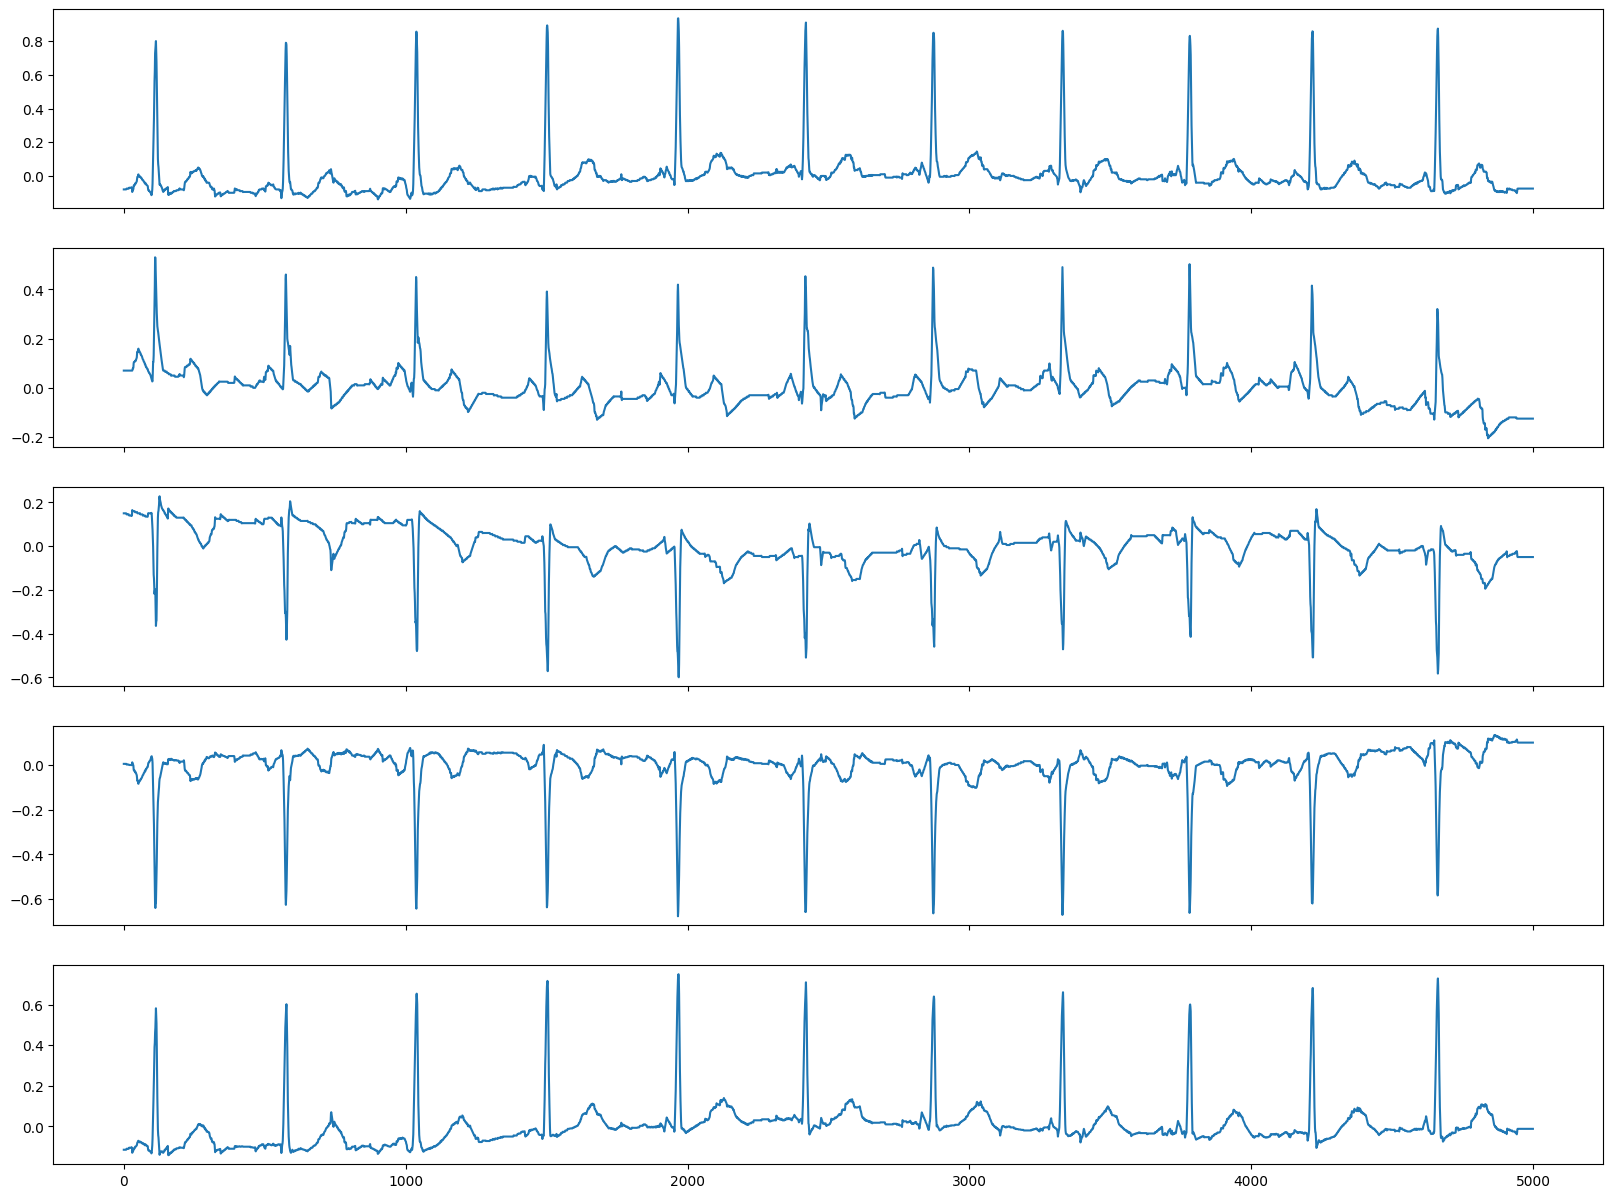

In [ ]:
# Regular heart rate
normal_case = random.choice(list(afib_df[afib_df['ritmi']==0].index))

# plot using numpy array data with afib_case as layers.
fig,ax = plt.subplots(5,1,figsize=(20,15),sharex=True,sharey=False)
for i in range(5):
    ax[i].plot(ecgeq_arr[normal_case,:,i])

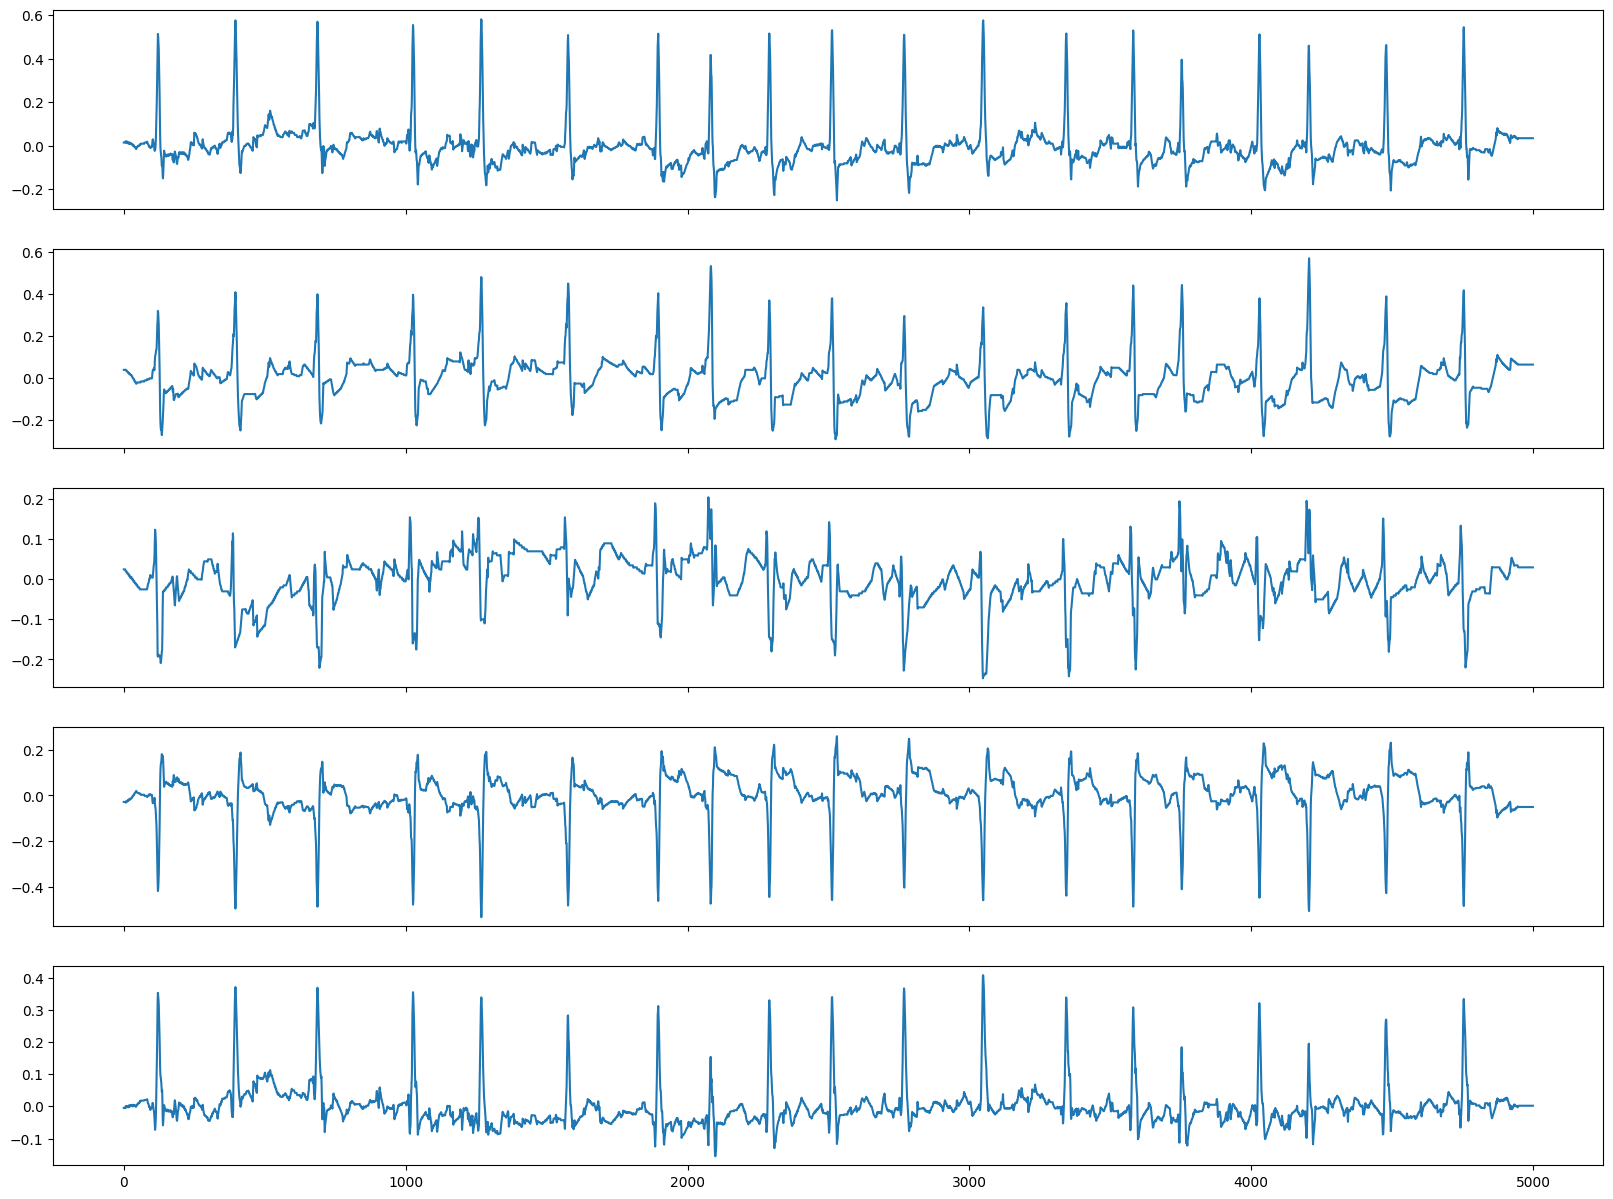

In [ ]:
# AFib Data
afib_case = random.choice(list(afib_df[afib_df['ritmi']==1].index))

# plot using numpy array data with afib_case as layers.
fig,ax = plt.subplots(5,1,figsize=(20,15),sharex=True,sharey=False)
for i in range(5):
    ax[i].plot(ecgeq_arr[afib_case,:,i])

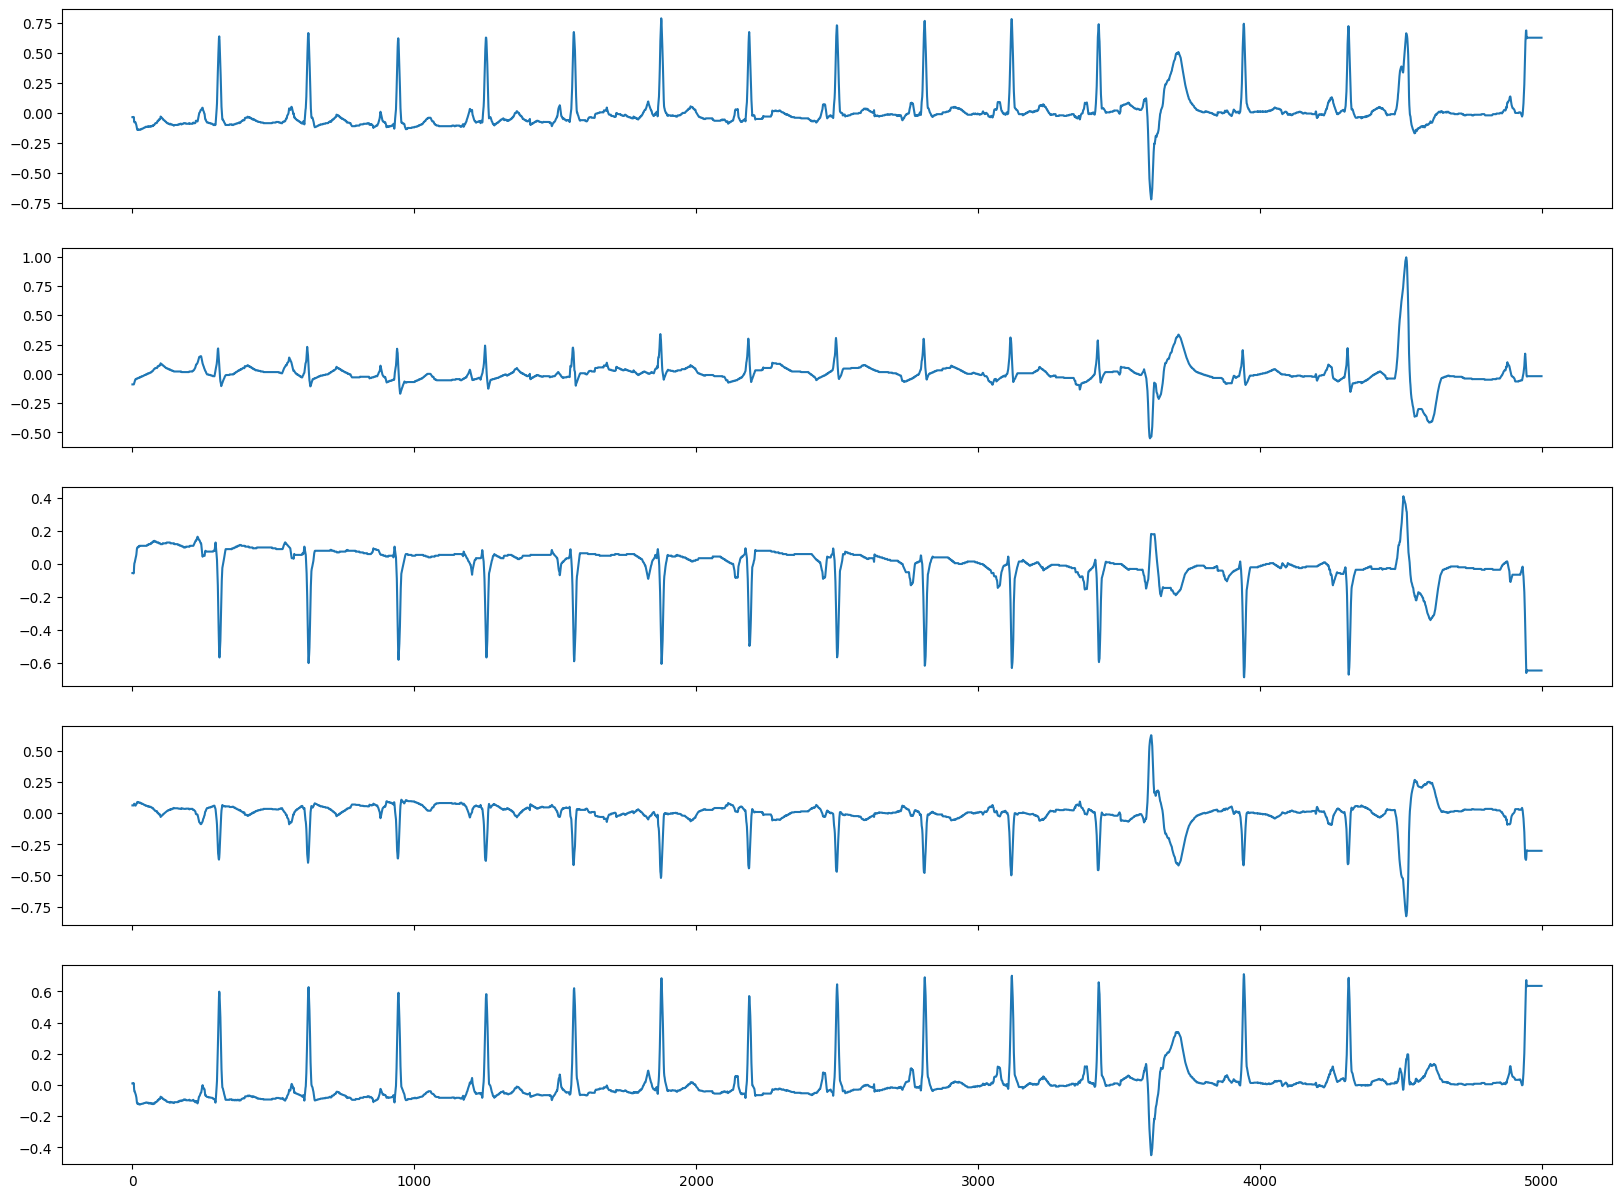

In [ ]:
# Arrythmia
other_case = random.choice(list(afib_df[afib_df['ritmi']==2].index))

# plot using numpy array data with afib_case as layers.
fig,ax = plt.subplots(5,1,figsize=(20,15),sharex=True,sharey=False)
for i in range(5):
    ax[i].plot(ecgeq_arr[other_case,:,i])

In [ ]:
# CSV link: https://github.com/tvo10/atrial-fibrillation-detection/tree/main
df = pd.read_csv('data/af_dataset.csv')
df

,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,...,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
1,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.211,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
2,-0.005,0.131,0.136,-0.063,-0.070,0.133,-0.125,-0.082,-0.102,-0.190,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
3,-0.005,0.130,0.135,-0.063,-0.070,0.132,-0.122,-0.077,-0.094,-0.172,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
4,-0.005,0.128,0.133,-0.062,-0.069,0.130,-0.119,-0.071,-0.084,-0.157,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319171,0.010,0.170,0.160,-0.090,-0.075,0.165,0.155,0.365,0.230,0.030,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319172,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.368,0.245,0.029,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319173,0.016,0.176,0.160,-0.096,-0.073,0.167,0.155,0.383,0.261,0.040,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319174,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.406,0.282,0.059,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8


In [ ]:
for i in range(26):
    df[df.columns[i]] = df[df.columns[i]].astype('float64')

# get info for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319176 entries, 0 to 4319175
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   I                   float64
 1   II                  float64
 2   III                 float64
 3   aVF                 float64
 4   aVR                 float64
 5   aVL                 float64
 6   V1                  float64
 7   V2                  float64
 8   V3                  float64
 9   V4                  float64
 10  V5                  float64
 11  V6                  float64
 12  ritmi               float64
 13  age                 float64
 14  sex                 float64
 15  height              float64
 16  weight              float64
 17  nurse               float64
 18  site                float64
 19  device              float64
 20  heart_axis          float64
 21  validated_by        float64
 22  second_opinion      float64
 23  validated_by_human  float64
 24  pacemaker           floa

In [ ]:
X = df.drop(columns='ritmi')
y = df['ritmi']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 1234)
X = df.drop(columns = ['ritmi','heart_axis','pacemaker','second_opinion','strat_fold','validated_by','validated_by_human'])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# import essential libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import warnings
from tensorflow.keras.models import Sequential
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,MaxPooling1D,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [ ]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
y_test_old = y_test.copy()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape[1]

3

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(100, activation="relu"))
lstm_model.add(Dense(y_train.shape[1], activation="softmax"))
lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 51203 (200.01 KB)
Trainable params: 51203 (200.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit network
history_lstm = lstm_model.fit(X_train, y_train, epochs=20)
# evaluate model
_, accuracy = lstm_model.evaluate(X_test, y_test)
lstm_pred_result = lstm_model.predict(X_test)

Epoch 1/20
101231/101231 [==============================] - 578s 6ms/step - loss: 0.7147 - accuracy: 0.6419
Epoch 2/20
101231/101231 [==============================] - 565s 6ms/step - loss: 0.4407 - accuracy: 0.7990
Epoch 3/20
101231/101231 [==============================] - 561s 6ms/step - loss: 0.3662 - accuracy: 0.8384
Epoch 4/20
101231/101231 [==============================] - 559s 6ms/step - loss: 0.3271 - accuracy: 0.8592
Epoch 5/20
101231/101231 [==============================] - 559s 6ms/step - loss: 0.3021 - accuracy: 0.8721
Epoch 6/20
101231/101231 [==============================] - 560s 6ms/step - loss: 0.2854 - accuracy: 0.8805
Epoch 7/20
101231/101231 [==============================] - 560s 6ms/step - loss: 0.2713 - accuracy: 0.8874
Epoch 8/20
101231/101231 [==============================] - 565s 6ms/step - loss: 0.2617 - accuracy: 0.8920
Epoch 9/20
101231/101231 [==============================] - 562s 6ms/step - loss: 0.2537 - accuracy: 0.8962
Epoch 10/20
101231/101231 [=

In [ ]:
final_pred_lstm = [np.argmax(i) for i in lstm_pred_result]
print(classification_report(y_test_old,final_pred_lstm))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88    335792
         1.0       0.82      0.93      0.87    267846
         2.0       0.92      0.88      0.90    476156

    accuracy                           0.89   1079794
   macro avg       0.88      0.89      0.88   1079794
weighted avg       0.89      0.89      0.89   1079794



<Axes: >

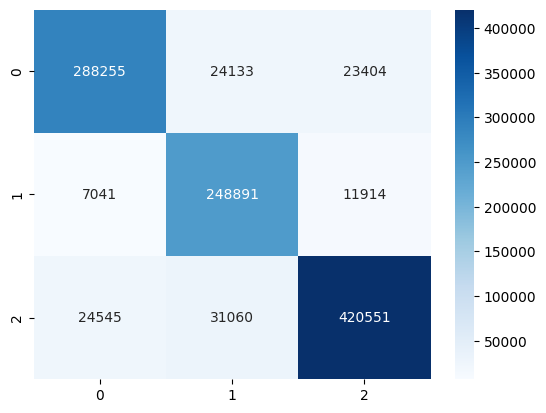

In [ ]:
# confusion matrix

cm = confusion_matrix(y_test_old, final_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
lstm_model.save('/content/drive/Shareddrives/OG_Mood_Lyric_Processors_CS272/CS284A/lstm_saved.h5')